# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')


heroes_df.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:

print('heroes_df: Descriptive Statistics')
print(heroes_df.describe())
print(' ')
print('heroes_df: Information')
print(heroes_df.info())
print('')
print('powers_df: Descriptive Statistics')
print(powers_df.describe())
print(' ')
print('powers_df: Information')
print(powers_df.info())

heroes_df: Descriptive Statistics
           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000
 
heroes_df: Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None

powers_df: Descriptive Statistics
       hero_names Agility Accelerated Healing Lantern Power Ring  \
count         667     667                 667                66

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

**Heroes Dataset**

First, the number NA values in each dataset are identified.  This is achieved by summing the NA values (True=1, False=0).

In [6]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

As can be seen from the above, there are two variables with null values:
- **Publisher**: 15 values out of 734 are null.     
- **Weight**: 2 values out of 734 are null.  

Before deciding how to deal with these null values, we must also identify any outliers.  It may be the case that these outliers are being used as placeholders.  If this is the case, a strategy for dealing with them must be employed.

For numerical outliers, the extreme values may be used as placeholders.  To identify any extreme values, we can employ the value_counts() function:

In [7]:
heroes_df['Height'].value_counts()

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 203.0      5
 211.0      5
 157.0      5
 244.0      4
 229.0      3
 155.0      3
 218.0      3
 226.0      3
 122.0      2
 206.0      2
 279.0      2
 366.0      2
 137.0      2
 30.5       2
 305.0      2
 61.0       1
 975.0      1
 142.0      1
 287.0      1
 267.0      1
 304.8      1
 701.0      1
 876.0      1
 259.0      1
 15.2       1
 297.0      1
 257.0      1
 62.5       1
 66.0       1
 160.0      1
 140.0      1
 234.0      1
 71.0       1
 79.0       1
 108.0      1
 64.0       1
Name: Height, dtype: int64

As can be seen from the above, -99 appears as a height 208 times.  Two features identify this as a placeholder value:
- It is negative
- It appears 208 times, many times more than any other value

Next, we do the same for the 'Weight' variable:

In [8]:
 heroes_df['Weight'].value_counts()

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
 52.0      15
 86.0      15
 59.0      14
 56.0      13
 77.0      13
 61.0      13
 101.0     12
 50.0      12
 88.0      11
 63.0      11
 83.0      10
 95.0      10
 74.0      10
 65.0       9
 72.0       8
 68.0       8
 104.0      8
 135.0      8
 57.0       7
 97.0       7
 99.0       7
 117.0      6
 108.0      6
 55.0       5
 70.0       5
         ... 
 14.0       1
 356.0      1
 105.0      1
 324.0      1
 360.0      1
 236.0      1
 36.0       1
 140.0      1
 128.0      1
 248.0      1
 16.0       1
 45.0       1
 234.0      1
 96.0       1
 82.0       1
 76.0       1
 198.0      1
 116.0      1
 176.0      1
 170.0      1
 47.0       1
 78.0       1
 27.0       1
 25.0       1
 178.0      1
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

Again, -99 appears as a weight 225 times.  This must also be a placeholder value.

Because so many records for the weight and height variable are either null, or have a placeholder, we cannot drop them.  This would reduce our dataset significantly.  Instead, we can populate these values with the median of our dataset.  

In [18]:
heroes_df.fillna(heroes_df['Height'].median(), inplace=True)
heroes_df.fillna(heroes_df['Weight'].median(), inplace=True)

heroes_df['Height'].replace([-99.0], heroes_df['Height'].median(), inplace=True)
heroes_df['Weight'].replace([-99.0], heroes_df['Weight'].median(), inplace=True)


To confirm that our strategy has been successful, we will:
- Confirm that there are no null values
- Confirm that all placeholders have been replaced with the median

In [19]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [20]:
heroes_df['Height'].value_counts()

175.0    251
183.0     59
188.0     51
178.0     39
180.0     38
185.0     35
168.0     29
165.0     26
170.0     26
193.0     21
191.0     21
198.0     18
173.0     17
201.0     11
196.0     11
163.0      8
213.0      7
211.0      5
203.0      5
157.0      5
244.0      4
229.0      3
155.0      3
218.0      3
226.0      3
122.0      2
30.5       2
206.0      2
305.0      2
137.0      2
279.0      2
366.0      2
234.0      1
297.0      1
267.0      1
304.8      1
701.0      1
61.0       1
876.0      1
259.0      1
15.2       1
287.0      1
71.0       1
257.0      1
66.0       1
160.0      1
140.0      1
64.0       1
142.0      1
62.5       1
108.0      1
79.0       1
975.0      1
Name: Height, dtype: int64

In [21]:
heroes_df['Weight'].value_counts()

62.5     237
79.0      23
54.0      23
81.0      22
90.0      19
52.0      15
86.0      15
59.0      14
56.0      13
61.0      13
77.0      13
101.0     12
50.0      12
88.0      11
63.0      11
83.0      10
74.0      10
95.0      10
65.0       9
72.0       8
135.0      8
104.0      8
68.0       8
99.0       7
57.0       7
97.0       7
108.0      6
117.0      6
70.0       5
158.0      5
        ... 
360.0      1
268.0      1
234.0      1
236.0      1
36.0       1
140.0      1
128.0      1
248.0      1
125.0      1
115.0      1
16.0       1
105.0      1
27.0       1
82.0       1
76.0       1
116.0      1
198.0      1
170.0      1
176.0      1
78.0       1
47.0       1
45.0       1
178.0      1
132.0      1
25.0       1
412.0      1
38.0       1
96.0       1
320.0      1
855.0      1
Name: Weight, Length: 136, dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [23]:
heroes_df.set_index('name').head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,62.5


In [25]:
powers_df.set_index('hero_names').head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
combined_df = heroes_df.join(powers_df, how='left')
combined_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,62.5,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

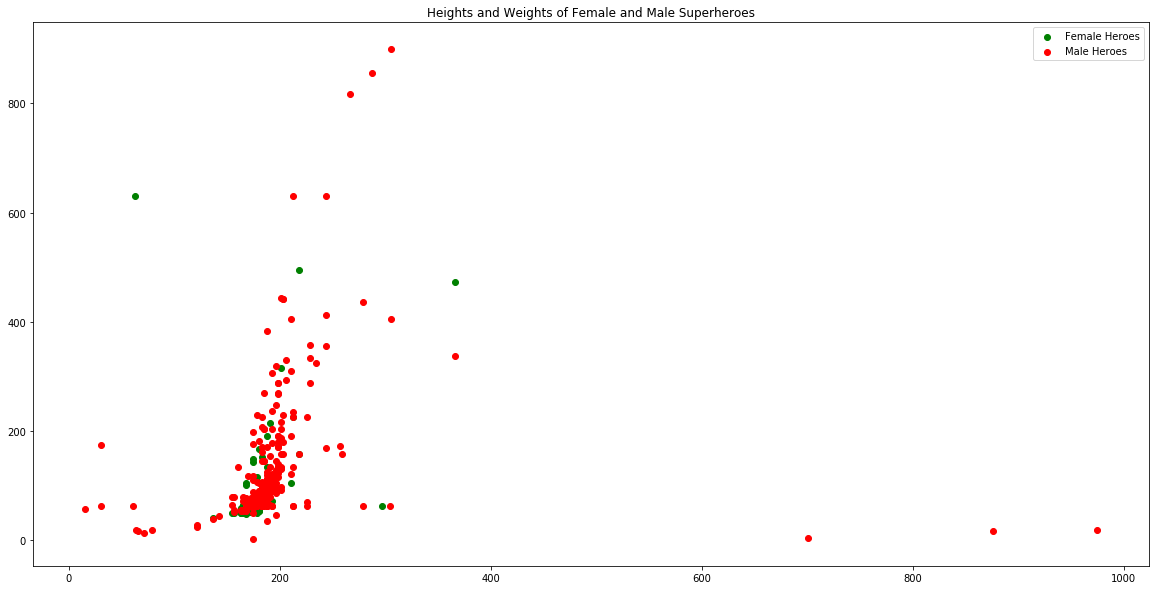

In [39]:
female_heroes_df = combined_df.loc[combined_df['Gender'] == 'Female']
male_heroes_df = combined_df.loc[combined_df['Gender'] == 'Male']

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.scatter(female_heroes_df['Height'], female_heroes_df['Weight'], c='g', label='Female Heroes')
ax1.scatter(male_heroes_df['Height'], male_heroes_df['Weight'], c='r', label='Male Heroes')
plt.legend()
plt.title("Heights and Weights of Female and Male Superheroes")
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [48]:
 # ISOBEL COMMENT: I've already sliced the dataframes by gender.  Don't need to do this again.  

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist(bins=20)
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

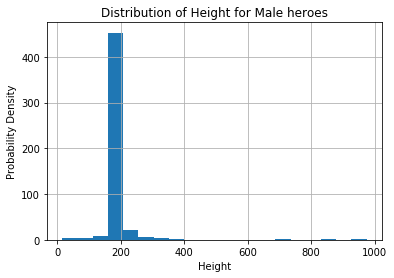

In [49]:
# Male Height

show_distplot(male_heroes_df, 'Male', 'Height')


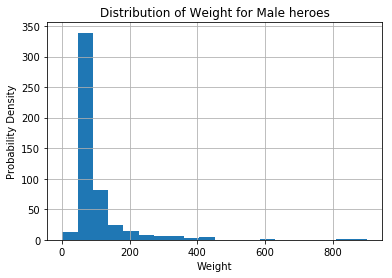

In [50]:
# Male Weight

show_distplot(male_heroes_df, 'Male', 'Weight')

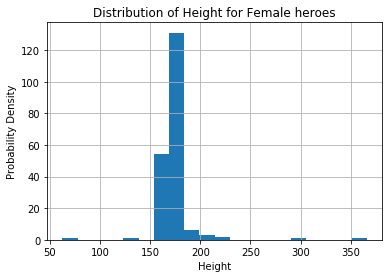

In [51]:
# Female Height

show_distplot(female_heroes_df, 'Female', 'Height')

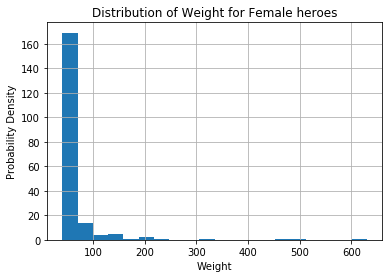

In [52]:
# Female Weight


show_distplot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

The frequency of the median weight and height for both genders is very high.  This is because the placeholder and null values have all been replaced by the median.  As a consequence, the variance of the height and weight distributions for superheroes has been reduced.  This should be kept in mind when analysing the data.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [88]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    
    for col in columns:
        df[col] = df[col].map({True: 1, False: 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 


In [89]:
top_5_powers(combined_df)

[('Super Strength', 360.0),
 ('Stamina', 289.0),
 ('Durability', 257.0),
 ('Super Speed', 249.0),
 ('Agility', 242.0)]

In [91]:
combined_df_marvel = combined_df.loc[combined_df['Publisher'] == 'Marvel Comics']
top_5_powers(combined_df_marvel)

[('Super Strength', 194.0),
 ('Stamina', 142.0),
 ('Durability', 138.0),
 ('Super Speed', 131.0),
 ('Agility', 113.0)]

In [92]:
combined_df_dc = combined_df.loc[combined_df['Publisher'] == "DC Comics"]
top_5_powers(combined_df_dc)

[('Super Strength', 97.0),
 ('Stamina', 91.0),
 ('Agility', 81.0),
 ('Durability', 76.0),
 ('Super Speed', 75.0)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

The top 5 powers are very similar in both the Marvel and DC universes.  The top 5 powers are identical.  In both datasets, super strength is the most frequent power.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

**Does gender affect the number of powers available to a superhero?**


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

**Step 1:** Create a new column indicating the total number of powers available to each individual superhero.

In [109]:
col_list = powers_df.columns.values[1:]
combined_df['Total_Powers'] = combined_df[col_list].sum(axis=1)
combined_df.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Total_Powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,4.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,7.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,16.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,1.0
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,62.5,...,False,False,False,False,False,False,False,False,False,8.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,...,False,False,False,False,False,False,False,False,False,14.0
6,Adam Monroe,Male,blue,-,Blond,175.0,NBC - Heroes,-,good,62.5,...,False,False,False,False,False,False,False,False,False,11.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,...,False,False,False,False,False,False,False,False,False,3.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,...,False,False,False,False,False,False,False,False,False,10.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,...,False,False,False,False,False,False,False,False,False,1.0


**Step 2:** Create two data subsets.  One for male superheros, and one for female superheroes.

In [113]:
female = combined_df.loc[(combined_df['Gender'] == 'Female')]
male = combined_df.loc[combined_df['Gender'] == 'Male']

**Step 3:** Scrutinise the descriptive statistics of each dataset.  This should provide a preliminary indication of whether there is any difference in the number of powers by gender.

In [116]:
female['Total_Powers'].describe()

count    200.000000
mean       8.190000
std        7.766951
min        0.000000
25%        2.000000
50%        6.000000
75%       12.000000
max       35.000000
Name: Total_Powers, dtype: float64

In [117]:
male['Total_Powers'].describe()

count    505.000000
mean       7.984158
std        7.333046
min        0.000000
25%        3.000000
50%        6.000000
75%       11.000000
max       49.000000
Name: Total_Powers, dtype: float64

Analysing the above, we can see that:
- The mean of each dataset is broadly similar (8.19 for female superheros, 7.98 for male superheros)
- The median of each dataset is identical (6 for both male and female superheros)
- Both lower and upper quartiles are fairly similar

On the surface, it looks as though there is limited difference between the number of superpowers of men and women.  

**Step 4**: To dig deeper, plot a histogram for each data subset.

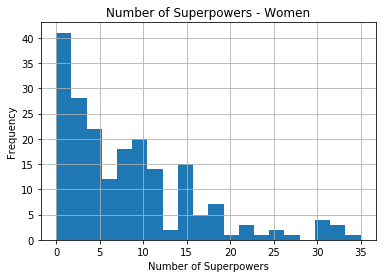

In [121]:
female['Total_Powers'].hist(bins=20)
plt.xlabel('Number of Superpowers')
plt.ylabel('Frequency')
plt.title('Number of Superpowers - Women')
plt.show()

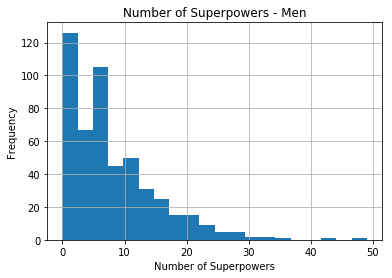

In [123]:
male['Total_Powers'].hist(bins=20)
plt.xlabel('Number of Superpowers')
plt.ylabel('Frequency')
plt.title('Number of Superpowers - Men')
plt.show()

The histograms above confirm our expectation that there is limited difference between the number of superpowers of male and female superheros.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data